[참고_1(05_18_수업)](https://colab.research.google.com/drive/1K7goXetBakLrYvXPiIeuEsqOIu0BN9or?usp=sharing), [참고_2(05_19_수업)](https://colab.research.google.com/drive/1_JKix4F7D_a2t7IO93PJp3heqggbT2SL?usp=sharing) [참고_3(05_20_수업)](https://colab.research.google.com/drive/1zxdaUV2bwdKIYsH5aWPx2xRfBcKanHXe?usp=sharing) [참고_4(proj_1)](https://drive.google.com/file/d/16hXo3Q2DtQGchuX-Kv-5eTtBeJR6e0l5/view?usp=sharing) [참고_5(proj_1-2)](https://colab.research.google.com/drive/1lxtg4VraVIMpuIsSkokblvHgDmbn6cFU?usp=sharing) 

[참고_6(05_24 수업)](https://colab.research.google.com/drive/1re3vdGCmLUfnEbYNGP-vcK9SBdkIhsK-?usp=sharing)

# 0. 데이터 정제 및 토큰화

## 0-1. 데이터 로드

In [ ]:
import pandas as pd

In [ ]:
# 이렇게하면 한 번씩 오류가 뜸..
# data = pd.read_table('news_data.csv', sep = ',')
# data.head()

In [ ]:
# 드라이브 마운트로 가져오는 법

csv_path = '/content/drive/MyDrive/dataset/news_data.csv'

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_table(csv_path, sep=',')
data.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [ ]:
data.info

<bound method DataFrame.info of                                                    news   code
0     파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...     사회
1     동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...     사회
2     황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...     사회
3     귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...     사회
4     (서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...     사회
...                                                 ...    ...
5244  신종 코로나바이러스 감염증(코로나19) 사태 이후 ‘가정의 달’ 5월에도 언택트(비...  IT/과학
5245  는 소비자로부터 월 이용료 1만~2만원을 받고 초고속 인터넷을 제공한다. 그런 SK...  IT/과학
5246  머리를 긁고 있는 오랑우탄. 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이...  IT/과학
5247  가 오는 15일 정식 출시하는 스마트폰 'LG벨벳'이 사실상 '공짜폰'이 될 전망이...  IT/과학
5248  이미지제공=게티이미지뱅크 이미지제공=게티이미지뱅크\n\n[Copyright ⓒ 전자...  IT/과학

[5249 rows x 2 columns]>

## 0-2. 데이터 정제

In [ ]:
import numpy as np

In [ ]:
# 한글과 공백을 제외한 텍스트 제거
data['news'] = data['news'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')

# 텍스트를 제거한 후 생길 수 있는 공백을 Nan 값으로 변경
data['news'].replace('', np.nan, inplace = True)

data['news']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0       파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1       동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2       황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3       귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4       서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
                              ...                        
5244    신종 코로나바이러스 감염증코로나 사태 이후 가정의 달 월에도 언택트비대면 신풍속도가...
5245    는 소비자로부터 월 이용료 만만원을 받고 초고속 인터넷을 제공한다 그런 브로드밴드가...
5246    머리를 긁고 있는 오랑우탄 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이 ...
5247    가 오는 일 정식 출시하는 스마트폰 벨벳이 사실상 공짜폰이 될 전망이다 단말기 가격...
5248    이미지제공게티이미지뱅크 이미지제공게티이미지뱅크  전자신문  전자신문인터넷 무단전재 ...
Name: news, Length: 5249, dtype: object

In [ ]:
data.info

<bound method DataFrame.info of                                                    news   code
0     파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...     사회
1     동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...     사회
2     황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...     사회
3     귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...     사회
4     서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...     사회
...                                                 ...    ...
5244  신종 코로나바이러스 감염증코로나 사태 이후 가정의 달 월에도 언택트비대면 신풍속도가...  IT/과학
5245  는 소비자로부터 월 이용료 만만원을 받고 초고속 인터넷을 제공한다 그런 브로드밴드가...  IT/과학
5246  머리를 긁고 있는 오랑우탄 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이 ...  IT/과학
5247  가 오는 일 정식 출시하는 스마트폰 벨벳이 사실상 공짜폰이 될 전망이다 단말기 가격...  IT/과학
5248  이미지제공게티이미지뱅크 이미지제공게티이미지뱅크  전자신문  전자신문인터넷 무단전재 ...  IT/과학

[5249 rows x 2 columns]>

In [ ]:
# null 값이 있는지 확인
data.isnull().sum(axis = 0)

news    0
code    0
dtype: int64

In [ ]:
print(data.isnull().values.any())

False


In [ ]:
# 만약, null 값이 존재했을 경우

data = data.dropna(how = 'any')
print('null 값을 제외한 샘플의 수 : ', len(data))

null 값을 제외한 샘플의 수 :  5249


In [ ]:
# 중복된 샘플 제거
data = data.drop_duplicates(subset = ['news'])
data.info

<bound method DataFrame.info of                                                    news   code
0     파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...     사회
1     동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...     사회
2     황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...     사회
3     귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...     사회
4     서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...     사회
...                                                 ...    ...
4950  신종 코로나바이러스 감염증코로나 사태 이후 가정의 달 월에도 언택트비대면 신풍속도가...  IT/과학
4951  는 소비자로부터 월 이용료 만만원을 받고 초고속 인터넷을 제공한다 그런 브로드밴드가...  IT/과학
4952  머리를 긁고 있는 오랑우탄 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이 ...  IT/과학
4953  가 오는 일 정식 출시하는 스마트폰 벨벳이 사실상 공짜폰이 될 전망이다 단말기 가격...  IT/과학
4954  이미지제공게티이미지뱅크 이미지제공게티이미지뱅크  전자신문  전자신문인터넷 무단전재 ...  IT/과학

[3985 rows x 2 columns]>

In [ ]:
data.shape

(3985, 2)

## 0-3. 레이블의 분포 확인

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_

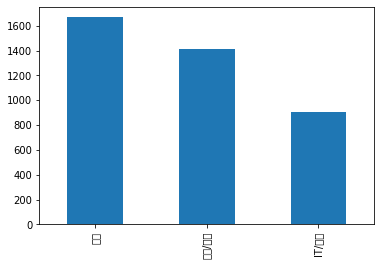

In [ ]:
data['code'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
# groupby를 사용하여 train_data의 ['code'] 컬럼으로 묶어내고 그 분류를 count 이름의 인덱스로 표현 

display(data.groupby('code').size().reset_index(name = 'count'))

,code,count
0,IT/과학,903
1,사회,1668
2,생활/문화,1414


## 0-4. 토큰화 및 불용어 제거

In [ ]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 495 kB/s 
     |████████████████████████████████| 453 kB 73.2 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 5.97 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-05-24 08:12:11--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.1

In [ ]:
from konlpy.tag import Mecab

tokenizer = Mecab()

In [ ]:
# 불용화 지정
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과',
             '때문','할','수','무단','따른','및','금지','전재','경향신문','기자',
             '는데','가','등','들','파이낸셜','저작','등','뉴스']

In [ ]:
# 토큰화 및 불용화 제거 함수 정의
def tokenize_and_remove_stopwords(data, stopwords, tokenizer):

    result = []

    for sentence in data:
        curr_data = []
        curr_data = tokenizer.morphs(sentence)
        curr_data = [word for word in curr_data if not word in stopwords]
        result.append(curr_data)

    # text_data_list = list(map(' '.join, text_data))                            # 이 한 문장이 문제였음..
    
    return result

In [ ]:
# 정의한 함수로 토큰화 및 불용어 제거하기(news 컬럼 기준)
text_data = tokenize_and_remove_stopwords(data['news'], stopwords, tokenizer)

[join](https://blockdmask.tistory.com/468) 설명

# 1. TF-IDF로 모델 설계하기

## 1-1. TF-IDF 모델 준비(텍스트 -> 시퀀스(TF-IDF 값)

TF-IDF : 모든 문서에 자주 등장하는 단어는 중요도가 낮다고 판단하고, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단하는 것

TF-IDF 훈련을 시키기 위해 train_test_split() 함수 사용

In [ ]:
text_data_list = list(map(' '.join, text_data))            # TF-IDF를 사용하기 위해 리스트로 바꿔야한다.

In [ ]:
print(data['news'][0]);print()
print(text_data_list[0])

파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 일 관내 취약계층 만가구에 대해 정부 긴급재난지원금 입금을 완료했다파주시민이 받는 긴급재난지원금은 인 이상 가구 기준으로 만원을 받게 되며 인 가구는 만원 인 가구 만원 인 가구 만원이다정부가 발표한 긴급재난지원금이 파주시민에게 지급한 금액과 다른 이유는 국비지방비 부담 비율 때문이다파주시는 이미 모든 시민에게 경기도파주시 재난기본소득인당 각 만원을 지급하고 있어 시민에게 국비 지원금만 지급하며 인 가구 기준으로 총 지원 금액은 파주시 재난기본소득 만원 경기도 재난기본소득 만원 정부 긴급재난지원금 만원 등 총 만원을 받게 된다취약계층이 아닌 시민은 오는 월일부터 소지하고 있는 신용체크카드사 홈페이지에서 긴급재난지원금 지원을 신청할 수 있다 세대주가 가족 지원금을 일괄 신청해야 한다한편 파주시는 일 김정기 부시장을 단장으로 하는 긴급재난지원금 추진 태스크포스를 구성해 긴급재난지원금이 원활하게 지급될 수 있도록 지원한다 저작권자  파이낸셜뉴스 무단 전재재배포 금지

파주 시청 사진제 공파 주시 파주 시청 사진 제공 파주시 파주 강근주 파 주 시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지원금 입금 완료 다파 주 시민 받 긴급 재난 지원금 인 이상 가구 기준 으로 만 원 받 게 되 며 인 가구 만 원 인 가구 만 원 인 가구 만 원 정부 발표 긴급 재난 지원금 파주 시민 지급 금액 다른 이유 국비 지방비 부담 비율 다파 주 시 이미 모든 시민 경기도 파주시 재난 기본 소득 인 당 각 만 원 지급 고 어 시민 국비 지원금 만 지급 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만 원 경기도 재난 기본소득 만 원 정부 긴급 재난 지원금 만 원 총 만 원 받 게 된다 취약 계층 아닌 시민 오 월일 부터 소지 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 세대주 가족 지원금 일괄 신청 해야 한다 한편 파 주 시 일 김정기 부시장 단장 으로 긴급 재난 지

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(text_data_list,
                                                    data['code'],
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [ ]:
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

print(len(data), len(x_train) + len(x_test))

2988 2988
997 997
3985 3985


In [ ]:
print(x_train[0]); print()
# print(y_train[0])

서울 뉴시스 이영환 이재용 삼성전자 부회장 일 오후 서울 서초동 삼성 사옥 에서 경영 권 승계 노동조합 문제 관련 해 대국민 사과 를 마친 후 고개 숙여 인사 를 고 서울 뉴시스 이영환 이재용 삼성전자 부회장 일 오후 서울 서초동 삼성 사옥 에서 경영 권 승계 노동조합 문제 관련 해 대국민 사과 를 마친 후 고개 숙여 인사 를 고 서울 뉴시스 이영환 이재용 삼성전자 부회장 일 오후 서울 서초동 삼성 사옥 에서 경영 권 승계 노동조합 문제 관련 해 대국민 사과 를 고 서울 뉴시스 이영환 이재용 삼성전자 부회장 일 오후 서울 서초동 삼성 사옥 에서 경영 권 승계 노동조합 문제 관련 해 대국민 사과 를 고 서울 뉴시스 이윤희 이재용 삼성전자 부회장 삼성 준법 감시 위원회 요청 따라 일 경영 권 승계 문제 대해 사과 한다는 입장 밝혀 주목 된다 특히 삼성 준 법위 국정 농단 사건 심리 중 인 재판부 재발 방지 요구 따라 설치 된 만큼 부회장 이번 사과 법원 심리 영향 미칠지 여부 를 두 고 여러 관측 나오 고 이날 부회장 서울 서초구 삼성전자 서초 사옥 에서 회견 열 고 그 동안 저 와 삼성 승계 문제 와 관련 해서 많 질책 받 아 왔다 면서 자리 에서 분명 게 약속 드리 겠 이제 경영 권 승계 문제 로 더 이상 논란 생기 지 않 도록 겠 다고 말 나아가 부회장 법 어기 일 결코 지 않 겠 편법 기대 거나 윤리 적 으로 지탄 받 일 도 지 않 겠 다면서 제 아이 회사 경영 권 물려주 지 않 생각 라고 앞서 삼성 준 법위 이재용 부회장 삼성그룹 경영 권 승계 의혹 노조 문제 시민 사회 소통 사안 관한 대국민 사과 를 권고 고 부회장 응답 것 으로 보인다 삼성 준 법위 부회장 국정 농단 공모 혐의 파 기환 송심 심리 중 인 법원 요청 으로 설립 된 기구 부회장 이번 사과 진행 중 인 재판 염두 둔 조치 라는 해석 도 나온다 앞서 부회장 뇌물 공 여 혐의 파 기환 송심 심리 중 인 서울 고법 형사 부부 장판 사 정준영 재판 과정 에서 사건 삼성그룹 총수 와 최고 위직 임원

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# x_train_tfidf 만들기
vector = CountVectorizer()

# x_train을 기준으로 DTM 완성(단어의 빈도수를 고려하여 행렬을 만든 것)            DTM : 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현
x_train_counts = vector.fit_transform(x_train)

# x_train_tfidf 행렬(벡터) 만들기
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [ ]:
print(x_train_counts.shape)
print(x_train_counts); print()

print(x_train_tfidf.shape)
print(x_train_tfidf)

(2988, 32127)
  (0, 56)	1
  (0, 493)	3
  (0, 916)	1
  (0, 1139)	1
  (0, 1154)	2
  (0, 1315)	1
  (0, 1324)	1
  (0, 1430)	9
  (0, 1542)	1
  (0, 1581)	2
  (0, 1591)	2
  (0, 1652)	1
  (0, 1694)	1
  (0, 1702)	1
  (0, 1937)	1
  (0, 2005)	1
  (0, 2029)	1
  (0, 2182)	1
  (0, 2243)	7
  (0, 2311)	2
  (0, 2315)	1
  (0, 2831)	4
  (0, 2959)	1
  (0, 2973)	1
  (0, 3472)	2
  :	:
  (2987, 25762)	1
  (2987, 26245)	1
  (2987, 26278)	1
  (2987, 26294)	1
  (2987, 26382)	1
  (2987, 26829)	1
  (2987, 27297)	1
  (2987, 27656)	4
  (2987, 27852)	1
  (2987, 27865)	1
  (2987, 28663)	1
  (2987, 28710)	1
  (2987, 28715)	2
  (2987, 29213)	1
  (2987, 29601)	5
  (2987, 29800)	1
  (2987, 30213)	1
  (2987, 30253)	3
  (2987, 31117)	5
  (2987, 31122)	3
  (2987, 31123)	1
  (2987, 31499)	1
  (2987, 31761)	1
  (2987, 32035)	3
  (2987, 32115)	1

(2988, 32127)
  (0, 31953)	0.02515333603992643
  (0, 31761)	0.017458514664937065
  (0, 31752)	0.028272228643742688
  (0, 31695)	0.01808573921651322
  (0, 31670)	0.026276718602259903
 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# 나이브 베이스 분류기 수행 (머신러닝 모델)

# x_train_tfidf : TF-IDF의 벡터, y_train : 레이블
clf = MultinomialNB().fit(x_train_tfidf, y_train)               # 나이브 베이스 훈련(x_train_tfidf, y_train)

In [ ]:
# x_test_tfidf를 만들기 위한 함수 정의
def tfidf_vectorizer(data):
    data_counts = vector.transform(data)                               # 여기서 vector는 sklearn.feature_extraction.tex의 CountVectorizer()
    data_tfidf = tfidf_transformer.transform(data_counts)            # 위의 x_train을 훈련시키는 것과 달리 fit 없이 transform만 진행
    return data_tfidf

In [ ]:
x_test_tfidf = tfidf_vectorizer(x_test)
print(x_test_tfidf.shape)
print(x_test_tfidf)

(997, 32127)
  (0, 31514)	0.04719256442558629
  (0, 31509)	0.0344956464117722
  (0, 31468)	0.06736824864379312
  (0, 31032)	0.05138824344902033
  (0, 30669)	0.034858094906305336
  (0, 30650)	0.0420676543002899
  (0, 30488)	0.04326537604407167
  (0, 30461)	0.0292849520486439
  (0, 30408)	0.1501283189388517
  (0, 30157)	0.04321304472039966
  (0, 30074)	0.04801649239716225
  (0, 29703)	0.06496130005573662
  (0, 29413)	0.07658702118165223
  (0, 29357)	0.05652776860790223
  (0, 27921)	0.046582274113127424
  (0, 27492)	0.10851514934943399
  (0, 27481)	0.049498092470871446
  (0, 27351)	0.07192714908772042
  (0, 26731)	0.11903769207556571
  (0, 26564)	0.040890743581246856
  (0, 26245)	0.07580178009162752
  (0, 25743)	0.029690556740648626
  (0, 25675)	0.053732151699607794
  (0, 25443)	0.043476981621078714
  (0, 25018)	0.06146106825353795
  :	:
  (996, 6879)	0.0407494941283023
  (996, 6837)	0.02895645910171617
  (996, 6724)	0.06272332967147465
  (996, 6567)	0.054906020375643565
  (996, 6007)	0.1

## 1-2. 결과 확인하기

In [ ]:
new_sent = tokenize_and_remove_stopwords(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."           
], stopwords, tokenizer)

new_sent_list = list(map(' '.join, new_sent))

In [ ]:
new_sent_pred = clf.predict(tfidf_vectorizer(new_sent_list))
print(new_sent_pred)

['사회']


In [ ]:
new_sent_2 = tokenize_and_remove_stopwords(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."  
], stopwords, tokenizer)

new_sent_list_2 = list(map(' '.join, new_sent_2))

In [ ]:
new_sent_pred_2 = clf.predict(tfidf_vectorizer(new_sent_list_2))
print(new_sent_pred_2)

['IT/과학']


## 1-3. 정확도 확인하기

In [ ]:
from sklearn import metrics

In [ ]:
#x_test에 대한 모델이 predict결과를 y_pred에 결과 저장하기
# metrics.classification_report로 모델이 예측한 y_pred와 실제 정답데이터 y_test 두개의 리포트 출력하기

# 나이브 베이스 모델에서 예측값 구하기
y_pred = clf.predict(x_test_tfidf)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.93      0.72      0.81       223
          사회       0.79      0.95      0.86       441
       생활/문화       0.85      0.74      0.79       333

    accuracy                           0.83       997
   macro avg       0.86      0.80      0.82       997
weighted avg       0.84      0.83      0.83       997



# 2. 딥러닝으로 모델 설계하기

1-4. 토큰화 및 불용어 제거 부분부터 이어서 시작

## 2-5. 단어장 기반 text_to_sequence(텍스트 -> 인덱스)

In [ ]:
print(text_data[0])

['파주', '시청', '사진제', '공파', '주시', '파주', '시청', '사진', '제공', '파주시', '파주', '강근주', '파', '주', '시', '일', '관내', '취약', '계층', '만', '가구', '대해', '정부', '긴급', '재난', '지원금', '입금', '완료', '다파', '주', '시민', '받', '긴급', '재난', '지원금', '인', '이상', '가구', '기준', '으로', '만', '원', '받', '게', '되', '며', '인', '가구', '만', '원', '인', '가구', '만', '원', '인', '가구', '만', '원', '정부', '발표', '긴급', '재난', '지원금', '파주', '시민', '지급', '금액', '다른', '이유', '국비', '지방비', '부담', '비율', '다파', '주', '시', '이미', '모든', '시민', '경기도', '파주시', '재난', '기본', '소득', '인', '당', '각', '만', '원', '지급', '고', '어', '시민', '국비', '지원금', '만', '지급', '며', '인', '가구', '기준', '으로', '총', '지원', '금액', '파주시', '재난', '기본소득', '만', '원', '경기도', '재난', '기본소득', '만', '원', '정부', '긴급', '재난', '지원금', '만', '원', '총', '만', '원', '받', '게', '된다', '취약', '계층', '아닌', '시민', '오', '월일', '부터', '소지', '고', '신용', '체크카드', '사', '홈페이지', '에서', '긴급', '재난', '지원금', '지원', '신청', '세대주', '가족', '지원금', '일괄', '신청', '해야', '한다', '한편', '파', '주', '시', '일', '김정기', '부시장', '단장', '으로', '긴급', '재난', '지원금', '추진', '태', '스', '크', '포스', '를', '구성'

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
# def tokenize_and_remove_stopwords(data, stopwords, tokenizer):
#     result = []

#     for sentence in data:
#         curr_data = []
#         curr_data = tokenizer.morphs(sentence)                                   # mecab 형태소 분석 tokenizer
#         curr_data = [word for word in curr_data if not word in stopwords]        # 불용어 제거
#         result.append(curr_data)
#     return result 

def load_data(text_data, num_words=10000):

    # 중복 제거
    # text_data.drop_duplicates(subset=['news'], inplace=True)

    # Nan 결측치 제거
    # text_data = train_data.dropna(how='any')

    # 토큰화 및 불용어 제거
    # text_token = tokenize_and_remove_stopwords(text_data, stopwords, tokenizer)

    # 단어장 만드는 중...
    # print(x_train[0])
    words = np.concatenate(text_data).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
    
    text_token = list(map(wordlist_to_indexlist, text_data))

    x_train, x_test, y_train, y_test = train_test_split(text_token, 
                                                        data['code'],
                                                        test_size = 0.25,
                                                        random_state = 42)

    return x_train, x_test, y_train, y_test, word_to_index

In [ ]:
x_train, x_test, y_train, y_test, word_to_index = load_data(text_data)

갑자기 된 이유가 뭐지? -> 지금까지 위에서 정의했던 tokenize_and_remove_stopwords()에서는 text_data를 list로 변형시키는 문장을 넣었었다...

In [ ]:
print(x_train[0])
# print(y_train[0])

[33, 130, 7809, 669, 321, 191, 10, 141, 33, 2212, 147, 1013, 7, 217, 75, 548, 2040, 173, 99, 11, 629, 235, 4, 2158, 188, 1899, 3228, 1245, 4, 5, 33, 130, 7809, 669, 321, 191, 10, 141, 33, 2212, 147, 1013, 7, 217, 75, 548, 2040, 173, 99, 11, 629, 235, 4, 2158, 188, 1899, 3228, 1245, 4, 5, 33, 130, 7809, 669, 321, 191, 10, 141, 33, 2212, 147, 1013, 7, 217, 75, 548, 2040, 173, 99, 11, 629, 235, 4, 5, 33, 130, 7809, 669, 321, 191, 10, 141, 33, 2212, 147, 1013, 7, 217, 75, 548, 2040, 173, 99, 11, 629, 235, 4, 5, 33, 130, 2, 669, 321, 191, 147, 708, 662, 240, 659, 138, 10, 217, 75, 548, 173, 200, 235, 423, 313, 2798, 901, 78, 204, 147, 491, 6326, 2091, 2474, 269, 1350, 49, 15, 1239, 2662, 573, 476, 138, 563, 25, 407, 191, 81, 235, 599, 1350, 361, 8953, 792, 4, 90, 5, 636, 1386, 541, 5, 136, 191, 33, 2373, 321, 2624, 1013, 7, 711, 207, 5, 69, 297, 498, 14, 147, 548, 173, 14, 99, 408, 106, 6423, 32, 56, 9573, 66, 594, 7, 2835, 17, 1576, 1795, 43, 843, 217, 75, 548, 173, 8, 97, 112, 775, 1407, 

---------------

In [ ]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [ ]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수
# 단, 모든 문장은 <BOS>로 시작하는 것을 말합니다.

def get_encoded_sentence(sentence, word_to_index):                                                        # 텍스트 -> 숫자
    return [word_to_index['<BOS>']] + [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해주는 함수입니다.
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):                                                # 숫자 -> 텍스트
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])

# 여러개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다.
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [ ]:
get_decoded_sentence(x_train[0], index_to_word)

'뉴시스 이영환 이재용 삼성전자 부회장 일 오후 서울 서초동 삼성 사옥 에서 경영 권 승계 노동조합 문제 관련 해 대국민 사과 를 마친 후 고개 숙여 인사 를 고 서울 뉴시스 이영환 이재용 삼성전자 부회장 일 오후 서울 서초동 삼성 사옥 에서 경영 권 승계 노동조합 문제 관련 해 대국민 사과 를 마친 후 고개 숙여 인사 를 고 서울 뉴시스 이영환 이재용 삼성전자 부회장 일 오후 서울 서초동 삼성 사옥 에서 경영 권 승계 노동조합 문제 관련 해 대국민 사과 를 고 서울 뉴시스 이영환 이재용 삼성전자 부회장 일 오후 서울 서초동 삼성 사옥 에서 경영 권 승계 노동조합 문제 관련 해 대국민 사과 를 고 서울 뉴시스 <UNK> 이재용 삼성전자 부회장 삼성 준법 감시 위원회 요청 따라 일 경영 권 승계 문제 대해 사과 한다는 입장 밝혀 주목 된다 특히 삼성 준 법위 국정 농단 사건 심리 중 인 재판부 재발 방지 요구 따라 설치 된 만큼 부회장 이번 사과 법원 심리 영향 미칠지 여부 를 두 고 여러 관측 나오 고 이날 부회장 서울 서초구 삼성전자 서초 사옥 에서 회견 열 고 그 동안 저 와 삼성 승계 문제 와 관련 해서 많 질책 받 아 왔다 면서 자리 에서 분명 게 약속 드리 겠 이제 경영 권 승계 문제 로 더 이상 논란 생기 지 않 도록 겠 다고 말 나아가 부회장 법 어기 일 결코 지 않 겠 편법 기대 거나 윤리 적 으로 지탄 받 일 도 지 않 겠 다면서 제 아이 회사 경영 권 물려주 지 않 생각 라고 앞서 삼성 준 법위 이재용 부회장 삼성그룹 경영 권 승계 의혹 노조 문제 시민 사회 소통 사안 관한 대국민 사과 를 권고 고 부회장 응답 것 으로 보인다 삼성 준 법위 부회장 국정 농단 공모 혐의 파 기환 송심 심리 중 인 법원 요청 으로 설립 된 기구 부회장 이번 사과 진행 중 인 재판 염두 둔 조치 라는 해석 도 나온다 앞서 부회장 뇌물 공 여 혐의 파 기환 송심 심리 중 인 서울 고법 형사 부부 장판 사 정준영 재판 과정 에서 사건 삼성그룹 총수 와 최고 <UNK>

## 2-6. 모델 구성을 위한 데이터 분석 및 가공

In [ ]:
# 데이터 셋 내 문장 길이 분포
total_data_text = list(x_train) + list(x_test)

# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장 길이의 평균값, 최대값, 표준편차를 계산
print('문장길이 평균 :', np.mean(num_tokens))
print('문장길이 최대 :', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를 들면 최대길이를 (평균 + 2*표준편차)로 한다면,
max_tokens = np.mean(num_tokens) +2 * np.std(num_tokens)

maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens)/len(num_tokens)))

문장길이 평균 : 308.70539523212045
문장길이 최대 : 6008
문장길이 표준편차 :  293.2172288951558
pad_sequences maxlen :  895
전체 문장의 0.9761606022584692%가 maxlen 설정값 이내에 포함됩니다. 


### 2-6_1. 패딩

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train = pad_sequences(x_train, value=word_to_index['<PAD>'], padding='pre', maxlen=maxlen)
x_test = pad_sequences(x_test, value=word_to_index['<PAD>'], padding='pre', maxlen=maxlen)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2988, 895)
(2988,)
(997, 895)
(997,)


In [ ]:
print(x_train[:5]); print()
print(x_test[:5])

[[  0   0   0 ... 484 442 130]
 [  0   0   0 ... 675  43  24]
 [  0   0   0 ...  93  37  52]
 [  0   0   0 ... 222  37  52]
 [  0   0   0 ... 222  37  52]]

[[   0    0    0 ...    9   37   52]
 [   0    0    0 ... 3090   52  117]
 [   0    0    0 ...  222   37   52]
 [   0    0    0 ... 7278   37   52]
 [   0    0    0 ... 6957  113  108]]


## 2-7. 라벨 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le = le.fit(data['code'])   #train['col']을 fit
y_train = le.transform(y_train)   #train['col']에 따라 encoding
y_test = le.transform(y_test)   #train['col']에 따라 encoding

In [ ]:
print(y_train)

[1 1 2 ... 1 0 0]


In [ ]:
print(y_test)

[1 2 1 0 2 2 0 0 1 1 2 2 0 0 1 1 1 2 2 1 1 1 2 1 0 2 2 1 0 1 2 2 1 1 1 0 0
 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 2 2 2 1 2 0 1 1 1 0 2 0 0 0 1 2 1 2
 1 1 1 2 0 1 2 1 2 1 0 1 2 1 1 0 2 1 0 0 1 0 2 2 0 1 2 2 2 0 2 2 1 1 1 2 2
 0 1 2 2 0 1 2 2 2 0 2 2 1 2 2 2 2 2 2 1 1 1 1 1 2 2 0 2 2 1 1 2 2 1 2 2 2
 1 0 1 1 0 2 1 0 2 2 0 0 1 1 0 1 2 2 1 2 1 1 1 1 2 1 2 0 1 0 1 1 0 0 1 2 2
 1 1 1 1 1 0 1 1 0 0 2 0 1 2 0 2 1 2 2 1 0 2 2 2 0 1 0 1 1 1 1 2 1 1 2 1 1
 2 1 1 1 0 0 1 1 2 1 1 1 0 1 2 0 1 2 2 1 0 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 2
 2 1 1 2 0 1 0 2 1 2 1 1 0 1 1 2 1 2 0 2 2 0 1 1 1 1 2 1 1 1 0 2 1 2 1 2 1
 0 0 2 2 1 1 0 0 2 0 1 1 2 2 1 2 2 1 2 2 1 1 2 0 2 1 1 1 1 2 0 1 0 2 1 2 2
 2 1 2 1 1 1 2 1 2 1 1 2 0 0 1 1 2 1 1 1 2 2 2 1 2 2 2 1 1 1 2 1 1 2 1 1 1
 0 1 1 1 0 0 2 2 2 1 2 2 2 2 0 0 1 2 1 1 0 0 1 1 0 2 0 2 2 0 2 1 1 1 1 2 1
 0 0 1 2 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 2 1 1 1 0 2 0 1 2 0 0 2 1 0 1 2 1 2
 1 0 0 2 1 0 0 1 0 0 2 0 2 2 1 1 1 0 0 0 1 1 2 1 2 1 2 1 2 2 0 1 1 1 2 1 2
 1 1 0 2 1 1 0 1 0 2 2 0 

## 2-8. to_categorical으로 one-hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_test)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


## 2-9. 모델 설계

In [ ]:
from tensorflow import keras

In [ ]:
vocab_size = 10000
word_vector_dim = 200                                                            # 2의 배수, 단어에 대한 차원 지정

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(128))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         2000000   
                                                                 
 lstm (LSTM)                 (None, 128)               168448    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2,176,899
Trainable params: 2,176,899
Non-trainable params: 0
_________________________________________________________________


##2-10.  모델 훈련

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose =1, patience=4)          # patience는 loss가 증가하는 횟수에 따라 종료한다는 뜻
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', model='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs= 100
history = model.fit(x_train, y_train, epochs=epochs, callbacks=[es, mc],
                    batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
23/24 [===========================>..] - ETA: 0s - loss: 1.0405 - accuracy: 0.4745
Epoch 1: val_loss improved from inf to 0.91291, saving model to best_model.h5
24/24 [==============================] - 10s 122ms/step - loss: 1.0393 - accuracy: 0.4769 - val_loss: 0.9129 - val_accuracy: 0.5918
Epoch 2/100
23/24 [===========================>..] - ETA: 0s - loss: 0.7028 - accuracy: 0.7286
Epoch 2: val_loss improved from 0.91291 to 0.48913, saving model to best_model.h5
24/24 [==============================] - 2s 83ms/step - loss: 0.6996 - accuracy: 0.7296 - val_loss: 0.4891 - val_accuracy: 0.8245
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 0.2975 - accuracy: 0.8976
Epoch 3: val_loss improved from 0.48913 to 0.44344, saving model to best_model.h5
24/24 [==============================] - 2s 84ms/step - loss: 0.2975 - accuracy: 0.8976 - val_loss: 0.4434 - val_accuracy: 0.8385
Epoch 4/100
24/24 [==============================] - ETA: 0s - loss: 0.1407 - acc

## 2-11. 학습 결과

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded_model = load_model('best_model.h5')
print('\n 테스트 정확도 : %.4f' % (loaded_model.evaluate(x_test, y_test)[1]))

32/32 [==============================] - 1s 18ms/step - loss: 0.4434 - accuracy: 0.8385

 테스트 정확도 : 0.8385


In [ ]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 1s 18ms/step - loss: 0.6853 - accuracy: 0.8315


[0.6853316426277161, 0.8314945101737976]

## 2-12. loss, accuracy 그래프 시각화

In [ ]:
history_dict = history.history

print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

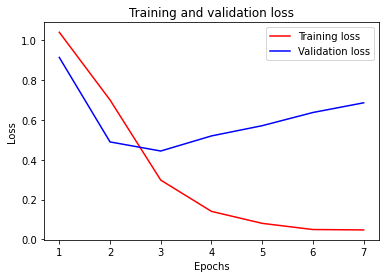

In [ ]:
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

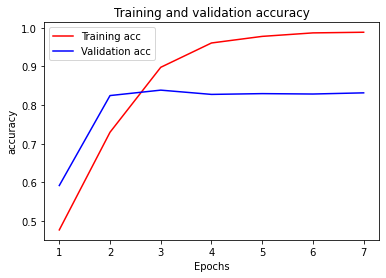

In [ ]:
plt.clf() #그림을 초기화

plt.plot(epochs, acc, 'r-', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## 2-12_1. EarlyStopping을 사용하지 않은 경우

In [ ]:
vocab_size = 10000
word_vector_dim = 200                                                            # 2의 배수, 단어에 대한 차원 지정

model_1 = keras.Sequential()
model_1.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_1.add(keras.layers.LSTM(128))
model_1.add(keras.layers.Dense(64, activation = 'relu'))
model_1.add(keras.layers.Dense(3, activation = 'softmax'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         2000000   
                                                                 
 lstm (LSTM)                 (None, 128)               168448    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2,176,899
Trainable params: 2,176,899
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs= 100
history_1 = model_1.fit(x_train, y_train, epochs=epochs,
                    batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
24/24 [==============================] - 131s 5s/step - loss: 0.6450 - accuracy: 0.4137 - val_loss: 0.6010 - val_accuracy: 0.4423
Epoch 2/100
24/24 [==============================] - 118s 5s/step - loss: 0.5520 - accuracy: 0.5311 - val_loss: 0.4817 - val_accuracy: 0.6469
Epoch 3/100
24/24 [==============================] - 132s 6s/step - loss: 0.3722 - accuracy: 0.7520 - val_loss: 0.3346 - val_accuracy: 0.7864
Epoch 4/100
24/24 [==============================] - 103s 4s/step - loss: 0.2187 - accuracy: 0.8815 - val_loss: 0.3026 - val_accuracy: 0.8205
Epoch 5/100
24/24 [==============================] - 97s 4s/step - loss: 0.1351 - accuracy: 0.9357 - val_loss: 0.3502 - val_accuracy: 0.7914
Epoch 6/100
24/24 [==============================] - 89s 4s/step - loss: 0.0892 - accuracy: 0.9608 - val_loss: 0.3468 - val_accuracy: 0.8235
Epoch 7/100
24/24 [==============================] - 87s 4s/step - loss: 0.0573 - accuracy: 0.9752 - val_loss: 0.3813 - val_accuracy: 0.8245
Epoch 8/1

In [ ]:
# load를 할 필요가 없음
history_dict_1 = history_1.history

print(history_dict_1.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
acc_1 = history_dict_1['accuracy']
val_acc_1 = history_dict_1['val_accuracy']
loss_1 = history_dict_1['loss']
val_loss_1 = history_dict_1['val_loss']

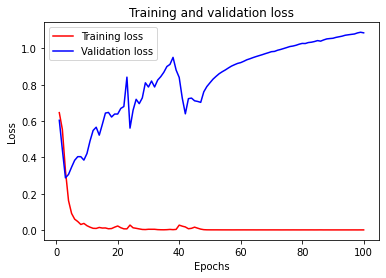

In [ ]:
epochs = range(1, len(acc_1)+1)

plt.plot(epochs, loss_1, 'r-', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

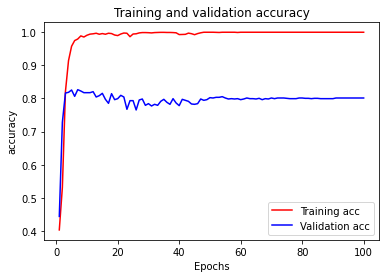

In [ ]:
plt.clf() #그림을 초기화

plt.plot(epochs, acc_1, 'r-', label= 'Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 3. 학습된 embedding layer 분석

## 3-1. word2vec 적용

### word2vec.txt 파일을 만들고 vector 값을 기입

In [ ]:
# gensim 의 유사단어 찾기를 활용하여 자체학습한 임베딩과 사전학습한 임베딩을 적절히 분석

# 학습한 embedding 파라미터를 파일에 저장
word2vec_file_path = './word2vec.txt'
f = open(word2vec_file_path,'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))
# 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.
# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 

vectors = model.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()                                                                               # word2vec.txt 파일 생성 확인

In [ ]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

### Word2VecKeyedVectors 안에 위에서 만든 word2vec.txt를 대입

In [ ]:
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['날씨']
vector

array([-0.03439643, -0.00217345,  0.04142469,  0.04375378, -0.05841054,
        0.01194294,  0.00279488, -0.02338509, -0.01898168, -0.05970981,
       -0.04154318,  0.05581011, -0.03230154,  0.01320499,  0.0120068 ,
        0.06749539,  0.02864741, -0.01128311, -0.01452595, -0.03080602,
       -0.00540434,  0.02576348,  0.04459278, -0.02704925,  0.02948244,
       -0.02943449, -0.03438977, -0.01222906, -0.02153175,  0.05675977,
        0.03100563,  0.0093057 , -0.00981892, -0.06648376,  0.03655087,
       -0.02286813,  0.01618125, -0.06113103, -0.07306627,  0.06290291,
        0.02330499, -0.05174954,  0.03507601,  0.03361178, -0.03064482,
       -0.01568363,  0.02115088, -0.00133355, -0.00409676, -0.02230334,
        0.05855144, -0.02256526,  0.06004645,  0.03075507,  0.03934904,
       -0.05989745,  0.00662468,  0.05084035,  0.07206636,  0.04873231,
       -0.03875561, -0.04509865,  0.0467632 ,  0.05430165, -0.01278044,
       -0.00735657,  0.01669888,  0.0076279 , -0.00388876,  0.01

### 유사 단어 검색

In [ ]:
word_vectors.similar_by_word("재미")

[('속도', 0.5641757249832153),
 ('르', 0.5286984443664551),
 ('김현아', 0.5195659399032593),
 ('응모', 0.5184520483016968),
 ('메가', 0.5147537589073181),
 ('프레시', 0.5140364170074463),
 ('체질', 0.5109304189682007),
 ('상정', 0.5013298988342285),
 ('스마트폰', 0.4995877146720886),
 ('가속', 0.4963090419769287)]

## 3-2. 한국어 word2vec 임베딩을 활용행 성능 개선

In [ ]:
import gensim

### 한국어 word2vec를 다운받아 gensim으로 로드

In [ ]:
word2vec_path = '/content/drive/MyDrive/dataset/ko.bin'
word2vec = gensim.models.Word2Vec.load(word2vec_path)
vector = word2vec['감동']
vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


array([-1.4411083 , -0.78142536,  2.453768  , -0.86445606,  0.24195324,
        0.36006922, -1.0639709 ,  0.85037315, -1.0184479 ,  0.21196692,
       -0.6679936 ,  0.6389819 , -0.26964295,  0.66028535,  0.39613017,
        0.6428288 ,  0.6648245 ,  0.08363932, -0.2540794 ,  0.55310047,
        0.63392764,  0.19311981, -0.4648248 ,  0.1490374 ,  2.0762694 ,
        0.7872764 , -0.21711552, -0.59049505, -1.3264338 , -0.06233318,
        1.2550159 , -0.05334642, -0.5453753 , -0.8736315 ,  0.5253877 ,
        0.03122815,  0.8280226 ,  0.23597455,  0.06136359,  1.5114233 ,
       -0.340495  ,  0.912277  ,  0.5899006 , -1.3025732 , -0.87596595,
        0.21738248,  1.0366931 , -0.55709684, -0.9039502 ,  0.28133616,
       -1.7572548 , -0.29769212, -0.14536098,  0.5850025 , -0.6111547 ,
       -0.29829553,  1.4106004 , -0.38685524,  0.4801454 ,  0.40166005,
        0.28174093,  1.6133646 , -0.8590998 ,  0.49886975,  0.38605362,
       -0.1607663 , -0.87983316,  0.21996935,  0.68561727, -0.84

### 유사 단어 검색

In [ ]:
word2vec.similar_by_word('로맨틱')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('코미디', 0.7576364278793335),
 ('로맨스', 0.7021660804748535),
 ('스릴러', 0.6693054437637329),
 ('개그', 0.6552960872650146),
 ('주제곡', 0.6495761871337891),
 ('뮤지컬', 0.6382305026054382),
 ('시트콤', 0.6167846322059631),
 ('서부극', 0.6151247620582581),
 ('연극과', 0.6083630323410034),
 ('서정적', 0.5965933799743652)]

## 3-3. embedding 모델 설계

In [ ]:
from tensorflow.keras.initializers import Constant

In [ ]:
vocab_size = 10000   # 어휘 사전의 크기
word_vector_dim = 200

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드벡터를 단어 하나씩마다 차례차례 카피한다
for i in range(4, vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


### Conv1D 사용

In [ ]:
vocab_size = 10000
word_vector_dim = 200

model_em = keras.Sequential()
model_em.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer = Constant(embedding_matrix), # 카피한 임베딩을 여기서 활용
                                 input_length = maxlen,
                                 trainable = True)) # trainable을 True로 주면 Fine-tuning
model_em.add(keras.layers.Conv1D(16, 7, activation='relu'))
model_em.add(keras.layers.MaxPooling1D(5))
model_em.add(keras.layers.Conv1D(16, 7, activation='relu'))
model_em.add(keras.layers.GlobalMaxPooling1D())
model_em.add(keras.layers.Dense(8, activation='relu'))
model_em.add(keras.layers.Dense(3, activation='softmax'))

model_em.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 895, 200)          2000000   
                                                                 
 conv1d_10 (Conv1D)          (None, 889, 16)           22416     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 177, 16)          0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 171, 16)           1808      
                                                                 
 global_max_pooling1d_5 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_14 (Dense)            (None, 8)                

## 3-4. 모델 훈련

In [ ]:
# 학습의 진행
model_em.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 100

history_em = model_em.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/100
24/24 [==============================] - 3s 49ms/step - loss: 1.1378 - accuracy: 0.4106 - val_loss: 1.0816 - val_accuracy: 0.5496
Epoch 2/100
24/24 [==============================] - 1s 24ms/step - loss: 1.0501 - accuracy: 0.5218 - val_loss: 1.0227 - val_accuracy: 0.5135
Epoch 3/100
24/24 [==============================] - 1s 26ms/step - loss: 0.9846 - accuracy: 0.5612 - val_loss: 0.9599 - val_accuracy: 0.5988
Epoch 4/100
24/24 [==============================] - 1s 22ms/step - loss: 0.8752 - accuracy: 0.6171 - val_loss: 0.8244 - val_accuracy: 0.6189
Epoch 5/100
24/24 [==============================] - 0s 20ms/step - loss: 0.6639 - accuracy: 0.7058 - val_loss: 0.7676 - val_accuracy: 0.6489
Epoch 6/100
24/24 [==============================] - 0s 20ms/step - loss: 0.5234 - accuracy: 0.7758 - val_loss: 0.7589 - val_accuracy: 0.6610
Epoch 7/100
24/24 [==============================] - 0s 20ms/step - loss: 0.4321 - accuracy: 0.8461 - val_loss: 0.7362 - val_accuracy: 0.6941
Epoch 

## 3-5. 학습 결과

In [ ]:
result = model_em.evaluate(x_test, y_test, verbose = 2)
print(result)

32/32 - 0s - loss: 1.0330 - accuracy: 0.8034 - 128ms/epoch - 4ms/step
[1.033029556274414, 0.8034102320671082]


## 3-6. loss, accuracy 그래프 시각화

In [ ]:
history_dict_em = history_em.history

print(history_dict_em.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
acc_em = history_dict_em['accuracy']
val_acc_em = history_dict_em['val_accuracy']
loss_em = history_dict_em['loss']
val_loss_em = history_dict_em['val_loss']

In [ ]:
print(epochs)

100


In [ ]:
print(len(acc_em))

100


In [ ]:
print(len(loss_em))

100


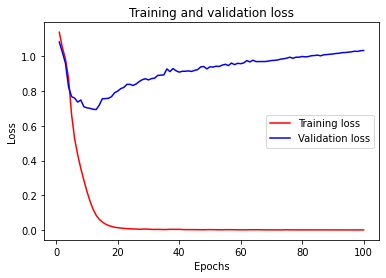

In [ ]:
epochs = range(1, len(acc_em)+1)

plt.plot(epochs, loss_em, 'r-', label='Training loss')
plt.plot(epochs, val_loss_em, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

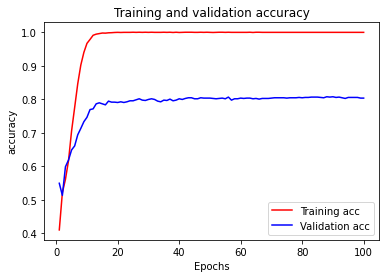

In [ ]:
plt.clf() #그림을 초기화

plt.plot(epochs, acc_em, 'r-', label= 'Training acc')
plt.plot(epochs, val_acc_em, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## 3-7_1. [FastText 사용](https://jh2021.tistory.com/6)

In [ ]:
from gensim.models import FastText
from gensim.models.keyedvectors import FastTextKeyedVectors

In [ ]:
# gensim 의 유사단어 찾기를 활용하여 자체학습한 임베딩과 사전학습한 임베딩을 적절히 분석

# 학습한 embedding 파라미터를 파일에 저장
fasttext_file_path = './fasttext.txt'
f = open(fasttext_file_path,'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))
# 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.
# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 

vectors = model.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close() 

In [ ]:
fast_vectors = FastTextKeyedVectors.load_fasttext_format(fasttext_file_path, binary=False)
vector = fast_vectors['날씨']
vector

In [ ]:
fast_vectors.similar_by_word("재미")

In [ ]:
from tensorflow.keras.initializers import Constant

In [ ]:
vocab_size = 10000   # 어휘 사전의 크기
word_vector_dim = 200

fast_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드벡터를 단어 하나씩마다 차례차례 카피한다
for i in range(4, vocab_size):
    if index_to_word[i] in fast_vectors:
        fast_matrix[i] = fast_vectors[index_to_word[i]]

In [ ]:
vocab_size = 10000
word_vector_dim = 200

model_ft = keras.Sequential()
model_ft.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer = Constant(fast_matrix), # 카피한 임베딩을 여기서 활용
                                 input_length = maxlen,
                                 trainable = True)) # trainable을 True로 주면 Fine-tuning
model_ft.add(keras.layers.Conv1D(16, 7, activation='relu'))
model_ft.add(keras.layers.MaxPooling1D(5))
model_ft.add(keras.layers.Conv1D(16, 7, activation='relu'))
model_ft.add(keras.layers.GlobalMaxPooling1D())
model_ft.add(keras.layers.Dense(8, activation='relu'))
model_ft.add(keras.layers.Dense(3, activation='softmax'))

model_ft.summary()

In [ ]:
# 학습의 진행
model_ft.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 100

history_ft = model_ft.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1)

In [ ]:
result = model_ft.evaluate(x_test, y_test, verbose = 2)
print(result)

In [ ]:
history_dict_ft = history_ft.history

print(history_dict_ft.keys())

In [ ]:
acc_ft = history_dict_ft['accuracy']
val_acc_ft = history_dict_ft['val_accuracy']
loss_ft = history_dict_ft['loss']
val_loss_ft = history_dict_ft['val_loss']

In [ ]:
epochs = range(1, len(acc_ft)+1)

plt.plot(epochs, loss_ft, 'r-', label='Training loss')
plt.plot(epochs, val_loss_ft, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf() #그림을 초기화

plt.plot(epochs, acc_ft, 'r-', label= 'Training acc')
plt.plot(epochs, val_acc_ft, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## 3-7_2. Glove 사용 -> 한글 불가

In [ ]:
!pip install glove_python_binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 948 kB 5.3 MB/s 


In [ ]:
from glove import Corpus, Glove

In [ ]:
cp = Corpus()
cp.fit(train_data, window = 5)

In [ ]:
glove = Glove(no_components = 10000, learning_rate = 0.25)

In [ ]:
glove.fit(cp.matrix, epochs = 10, no_threads = 4, verbose = True)
glove.add_dictionary(cp.dictionary)

In [ ]:
glove.most_similar('man')

In [ ]:
vocab_size = 10000   # 어휘 사전의 크기
word_vector_dim = 200

glove_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드벡터를 단어 하나씩마다 차례차례 카피한다
for i in range(4, vocab_size):
    if index_to_word[i] in glove:
        glove_matrix[i] = glove[index_to_word[i]]

In [ ]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000
word_vector_dim = 200

model_gl = keras.Sequential()
model_gl.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer = Constant(gl_matrix), # 카피한 임베딩을 여기서 활용
                                 input_length = maxlen,
                                 trainable = True)) # trainable을 True로 주면 Fine-tuning
model_gl.add(keras.layers.Conv1D(16, 7, activation='relu'))
model_gl.add(keras.layers.MaxPooling1D(5))
model_gl.add(keras.layers.Conv1D(16, 7, activation='relu'))
model_gl.add(keras.layers.GlobalMaxPooling1D())
model_gl.add(keras.layers.Dense(8, activation='relu'))
model_gl.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
# 학습의 진행
model_gl.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 100

history_gl = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1)

In [ ]:
result = model_gl.evaluate(x_test, y_test, verbose = 2)
print(result)

In [ ]:
history_dict_gl = history_em.history

print(history_dict_gl.keys())

In [ ]:
acc_gl = history_dict_gl['accuracy']
val_acc_gl = history_dict_gl['val_accuracy']
loss_gl = history_dict_gl['loss']
val_loss_gl = history_dict_gl['val_loss']

In [ ]:
epochs = range(1, len(acc_gl)+1)

plt.plot(epochs, loss_gl, 'r-', label='Training loss')
plt.plot(epochs, val_loss_gl, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf() #그림을 초기화

plt.plot(epochs, acc_gl, 'r-', label= 'Training acc')
plt.plot(epochs, val_acc_gl, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 전체적인 순서 정리

## - TF-IDF로 모델 설계하기

1. 데이터 불러오기
2. 노이즈 제거(정규식 표현)
3. null값 체크
4. 중복된 샘플 제거
5.EDA 데이터 분석
6. 토큰화 및 불영어 제거

7. train_test_split() 사용

8. TF-IDF 모델 설계
    - 텍스트 -> 시퀀스(tf-idf 값)

9. 머신러닝 모델
10. 학습 및 결과 확인

## - 딥러닝으로 모델 설계하기

1. 데이터 불러오기
2. 노이즈 제거(정규식 표현)
3. null값 체크
4. 중복된 샘플 제거
5.EDA 데이터 분석
6. 토큰화 및 불영어 제거

7. 단어장 기반 text_to_sequence(텍스트 -> 숫자)
8. padding
9. 라벨 인코딩(텍스트 -> 숫자) - LableEncoder()
10. to_categorical -> on-hot encoding

11. 모델 설계
12. 학습 및 결과 확인

## - embedding layer 분석

1. 데이터 불러오기
2. 노이즈 제거(정규식 표현)
3. null값 체크
4. 중복된 샘플 제거
5.EDA 데이터 분석
6. 토큰화 및 불영어 제거

7. 단어장 기반 text_to_sequence(텍스트 -> 숫자)
8. padding
9. 라벨 인코딩(텍스트 -> 숫자) - LableEncoder()
10. to_categorical -> on-hot encoding

11. word2vec 적용 - 한국어 embedding 적용
    - word2vec 말고 glove, fastext 적용 가능
12. embedding 모델 설계
    - Conv1D, LITM 등등
13. 모델 훈련
14. 학습 및 결과 확인

[첨부(예시_1)](https://drive.google.com/file/d/1znNpyVr5lZmquxd7vY5HvIvD-xWDlduj/view?usp=sharing) [첨부(예시_2)](https://drive.google.com/file/d/1NkLM_OA51ObEsWuQtjiuHrNybTP5yQKC/view?usp=sharing) [첨부(예시_3)](https://drive.google.com/file/d/1hf4DhLCXE5gBUIBxF8xPteFeF227GVNG/view?usp=sharing)